# Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sns
import warnings
warnings.filterwarnings
%matplotlib inline

# Read the data file

In [10]:
data = pd.read_csv('airlineDataFinal.csv')

# Exploratory data analysis

In [11]:
data.shape

(10997, 21)

In [12]:
data.describe()

,DepDelay,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut
count,10997.000000,10997.0,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,1.099700e+04
mean,40.525416,2008.0,6.576430,15.864418,4.027098,1553.055561,1521.427116,1634.181959,1692.661726,1080.186142,156.849686,158.677094,132.189052,38.904338,976.322906,6.240793,3.124408e+02
std,52.040277,0.0,3.515633,8.797698,2.013684,474.120261,435.881340,592.257567,485.766331,882.811184,80.203882,79.063950,77.243291,55.148362,638.054811,4.021251,3.083307e+04
min,6.000000,2008.0,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,41.000000,48.000000,22.000000,-42.000000,134.000000,1.000000,1.000000e+00
25%,11.000000,2008.0,3.000000,8.000000,2.000000,1223.000000,1200.000000,1335.000000,1405.000000,463.000000,93.000000,94.000000,68.000000,7.000000,451.000000,4.000000,1.100000e+01
50%,22.000000,2008.0,7.000000,16.000000,4.000000,1621.000000,1600.000000,1750.000000,1803.000000,904.000000,141.000000,145.000000,114.000000,22.000000,834.000000,5.000000,1.500000e+01
75%,47.000000,2008.0,10.000000,23.000000,6.000000,1927.000000,1855.000000,2102.000000,2050.000000,1572.000000,197.000000,200.000000,173.000000,49.000000,1390.000000,7.000000,2.200000e+01
max,691.000000,2008.0,12.000000,31.000000,7.000000,2400.000000,2355.000000,2400.000000,2359.000000,3953.000000,627.000000,604.000000,609.000000,679.000000,4502.000000,89.000000,3.233377e+06


# Handle the missing Values

In [13]:
# First create an Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'median', axis=0)
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit(data.iloc[:,7:8])
# update values of column with new values
data.iloc[:,7:8] = missingValueImputer.transform(data.iloc[:,7:8])

In [14]:
missingValueTotal = data.isnull().sum()
missingValuePercentage = round(((data.isnull().sum() / data.isnull().count()) * 100), 2)
missingValue = pd.concat([missingValueTotal, missingValuePercentage, ], axis = 1, keys = ['Total', 'Percentage'])
missingValue

,Total,Percentage
DepDelay,0,0.0
Year,0,0.0
Month,0,0.0
DayofMonth,0,0.0
DayOfWeek,0,0.0
DepTime,0,0.0
CRSDepTime,0,0.0
ArrTime,0,0.0
CRSArrTime,0,0.0
UniqueCarrier,0,0.0


# Identifying the correlation between the variables

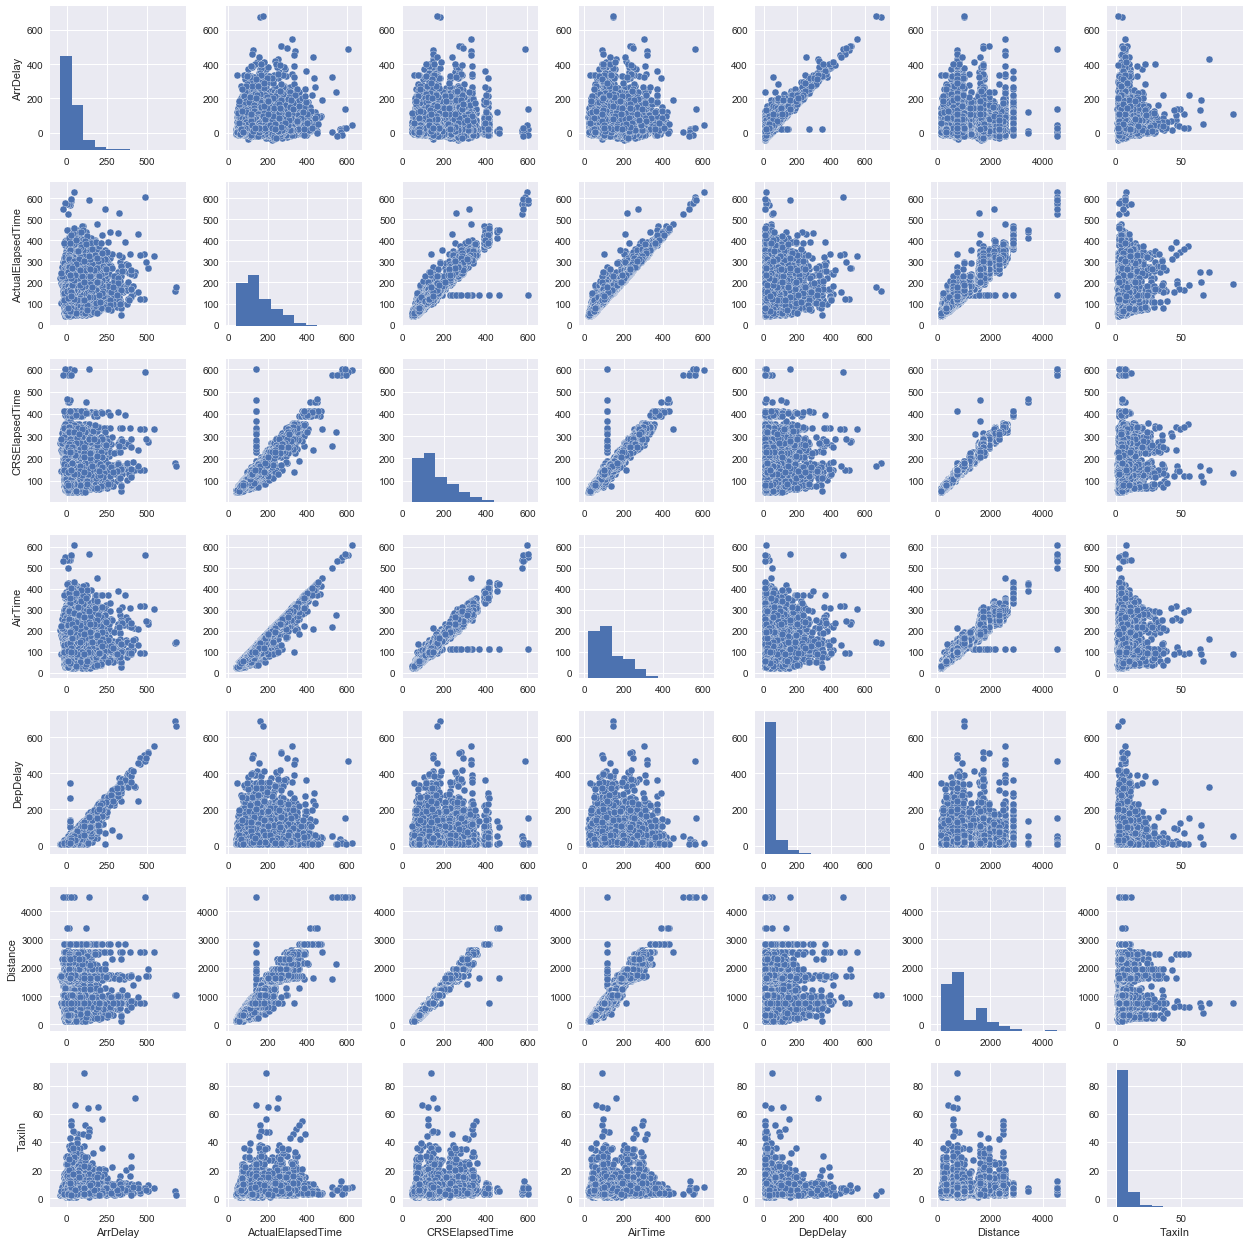

In [15]:
#Pairplot
sns.set()
cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn']
sns.pairplot(data[cols], size = 2.5)
plt.show()

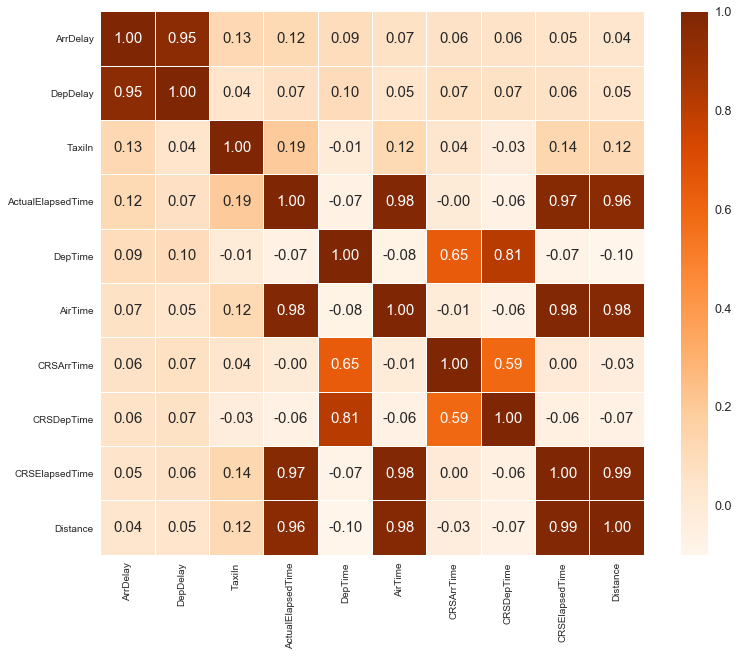

In [16]:
# Correlation matrix
corrmat = data.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(13, 10))
cols = corrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values, linewidth = 0.01, cmap = 'Oranges')
plt.show()